In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [26]:
df = pd.read_csv('feature-engineered.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Shipping_Days,Profit_Margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,3 days,0.1600
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,3 days,0.3000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,4 days,0.4700
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,7 days,-0.4000
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,7 days,0.1125


In [27]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order_Year',
       'Order_Month', 'Shipping_Days', 'Profit_Margin'],
      dtype='str')

In [37]:
cat_variables = ['Region', 'Category', 'Sub-Category', 'Segment', 'Ship Mode']
df_model = pd.get_dummies(df, columns=cat_variables, drop_first=True)

# Define target and features
X = df_model[['Sales', 'Quantity', 'Discount'] + [col for col in df_model.columns if 'Region_' in col or 'Category_' in col]]
y = df_model['Profit']
X = X.astype(float)
X = sm.add_constant(X)

In [38]:
X

,const,Sales,Quantity,Discount,Region_East,Region_South,Region_West,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,1.0,261.9600,2.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,731.9400,3.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,14.6200,2.0,0.00,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,957.5775,5.0,0.45,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,22.3680,2.0,0.20,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1.0,25.2480,3.0,0.20,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9990,1.0,91.9600,2.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9991,1.0,258.5760,2.0,0.20,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9992,1.0,29.6000,4.0,0.00,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
# Fit model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     229.1
Date:                Sat, 07 Feb 2026   Prob (F-statistic):               0.00
Time:                        14:02:57   Log-Likelihood:                -66668.
No. Observations:                9994   AIC:                         1.334e+05
Df Residuals:                    9971   BIC:                         1.335e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

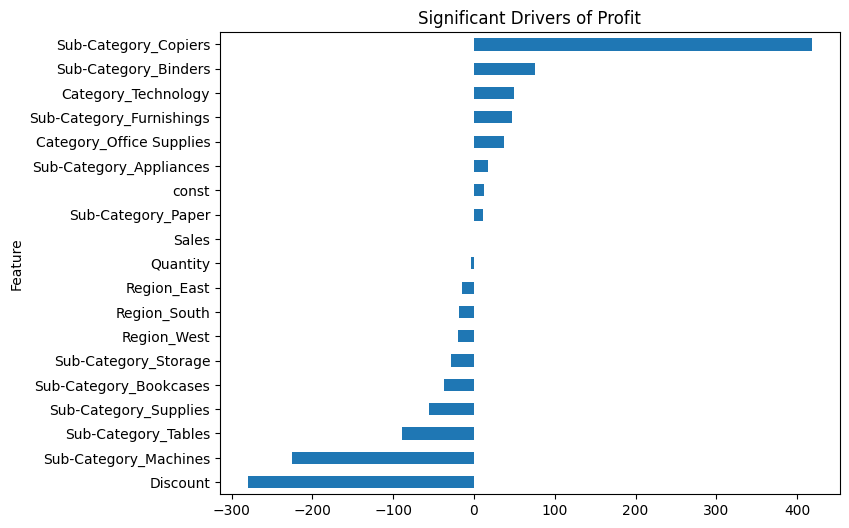

In [40]:
# Coefficients
coef_df = pd.DataFrame({
    'Feature': model.params.index,
    'Coefficient': model.params.values,
    'p-value': model.pvalues.values
})

# Only significant features
significant_coefs = coef_df[coef_df['p-value'] < 0.05].sort_values('Coefficient')
significant_coefs.plot(x='Feature', y='Coefficient', kind='barh', figsize=(8,6), legend=False)
plt.title('Significant Drivers of Profit')
plt.show()

Our regression analysis quantified the drivers of profit at the order level. Discounting had the most negative impact, eroding margins significantly. While increasing sales helps profit, simply selling more units without considering discounts can reduce profitability. Regional and category effects were also significant: East, South, and West regions lagged behind Central, while Office Supplies and Technology categories were consistently more profitable. These insights provide clear guidance for targeted pricing, discount strategies, and regional focus.